# Logistics Regression

- For this project I am using the Titanic Data Set from Kaggle.
- I'll be trying to predict a classification- survival or deceased.


In [1]:
# Import some important Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## The Data

In [2]:
# import traing and testing data
train_df = pd.read_csv('titanic_train.csv')

In [3]:
# Columns Present in dataset
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# Preview the data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- By the thoroughly observation it seems that:
- Categorical Features:Survived, Sex, and Embarked.
-  Numerical Features : Age, Fare, SibSp, Parch.
- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

In [5]:
# Information about the data set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Null Values present 'Age','Cabin' columns in both train and test dataset.


In [6]:
# Find missing values
train_df.Age.isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [7]:
train_df.Cabin.isna().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

- 177 null value present in 'Age' feature.
- 687 null value present in 'Cabin' features.

In [8]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


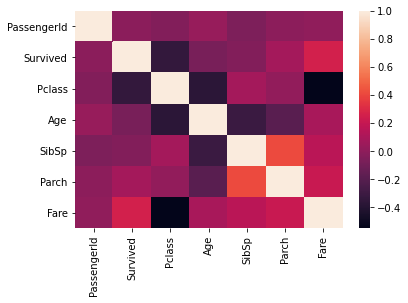

In [9]:
sns.heatmap(train_df.corr())

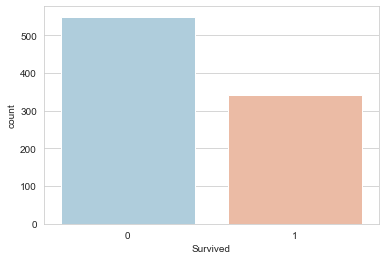

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df,palette='RdBu_r')

- In above chart showed that survived are less than deceased.

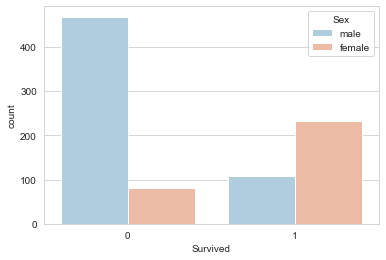

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='RdBu_r')

- The amount of servived of female are more than male.

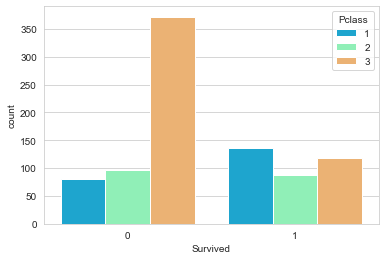

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='rainbow')

- Passanger of Class1 followed by the class3 and class2.

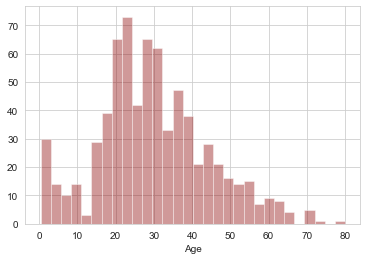

In [13]:
sns.distplot(train_df.Age.dropna(),kde=False,color='darkred',bins=30)

- This chart shows that the count of passengers with different age.
- The amount of passengers are more in the range of 20-40 yrs.

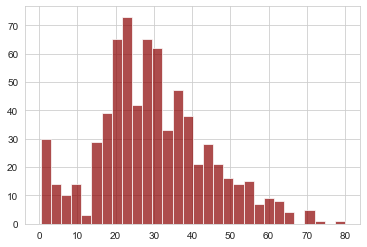

In [14]:
train_df['Age'].hist(bins=30,color='darkred',alpha=0.7)

## Cleaning the Data

- I want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers.
- We can find out the average age of passanger by the Boxplot. 


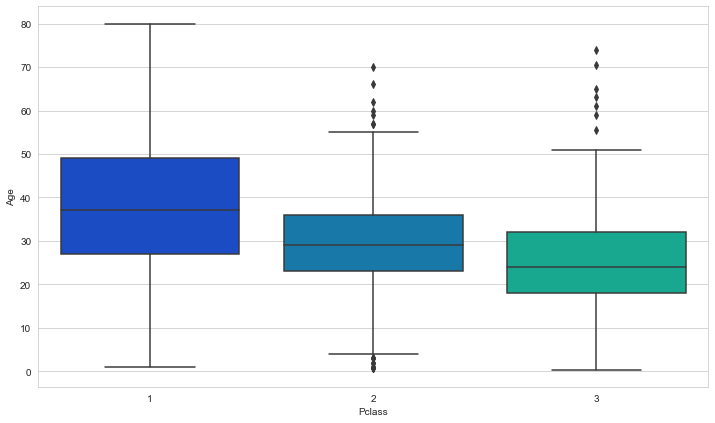

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

- We can see the passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.
- Passanger of Class1 mean age is 37, followed by class2 & class3 are 29 & 24 respectively.

In [16]:
# For training data
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

#### Now Apply this function on data set

In [17]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

#### Now, check again for missing value

- Now this time we will check missing value by heatmap.

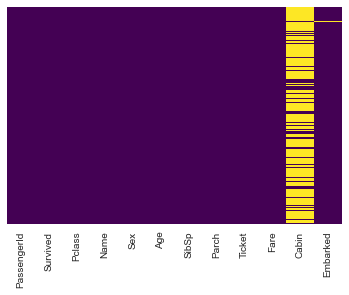

In [18]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

-  Drop the Cabin column and the row in Embarked that is NaN.

In [19]:
train_df.drop('Cabin',axis=1,inplace=True)

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
train_df.dropna(inplace=True)

## Converting Categorical Features

- We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [24]:
train_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
train_df = pd.concat([train_df,sex,embark],axis=1)

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


- Our data is ready for our model!

# Building a Logistic Regression model

### Splliting th data for training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = train_df.drop('Survived',axis=1)
y= train_df['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression(max_iter=700)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=700)

In [32]:
predictions = logmodel.predict(X_test)

### Evaluation of Logistics Regression model

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



- Accuracy of the model is 82%.

# Thank You!